In [1]:
from src.stock_bot.__main__ import run_back_strategy_core

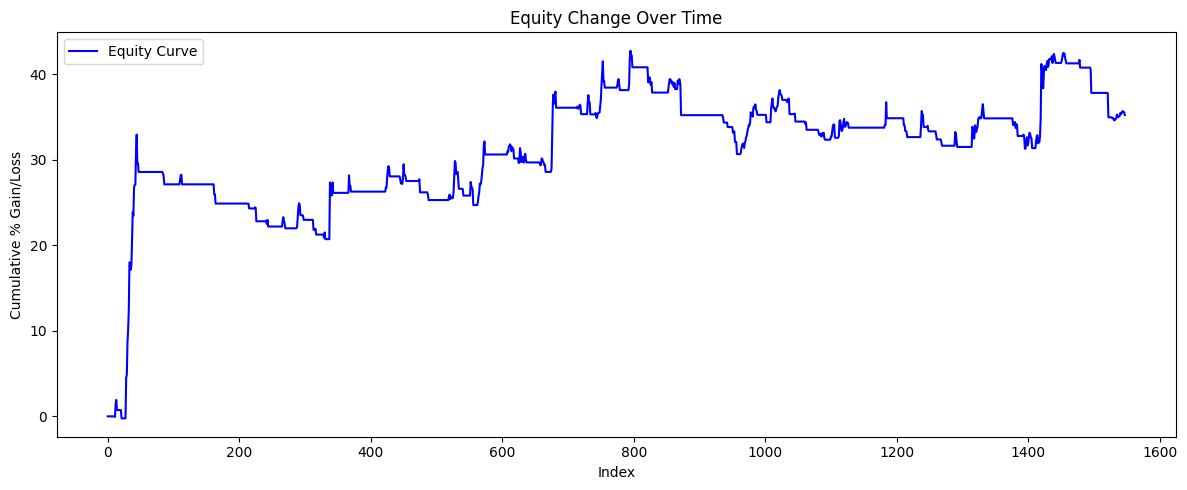

In [2]:
run_back_strategy_core(
    "IONQ",
    12, 26, 9, 14, 5, 20,
    "60d", "15m",
    False, True,
    notebook=True
)

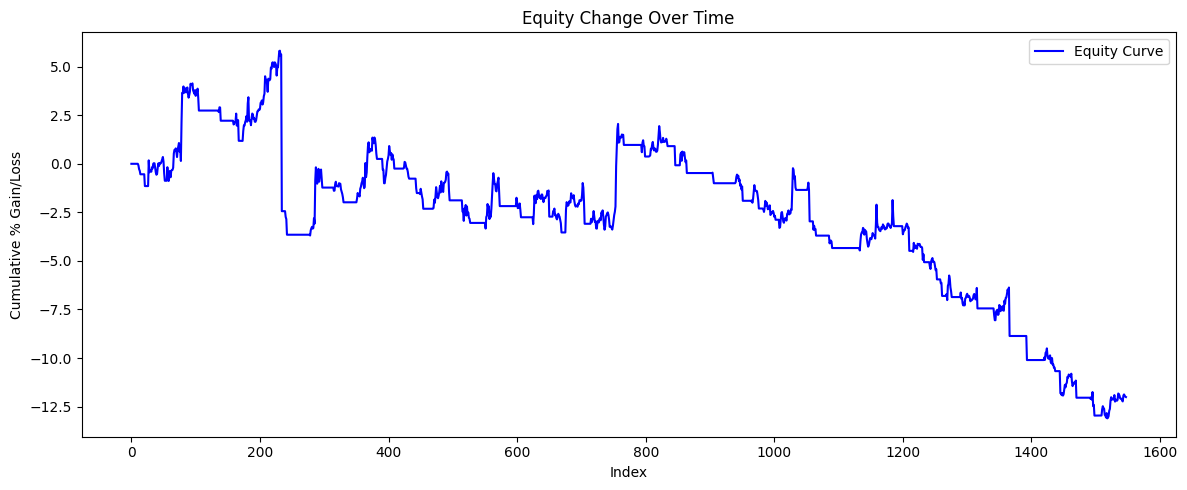

In [3]:
run_back_strategy_core(
    "CRWD",
    12, 26, 9, 14, 5, 20,
    "60d", "15m",
    False, True,
    notebook=True
)

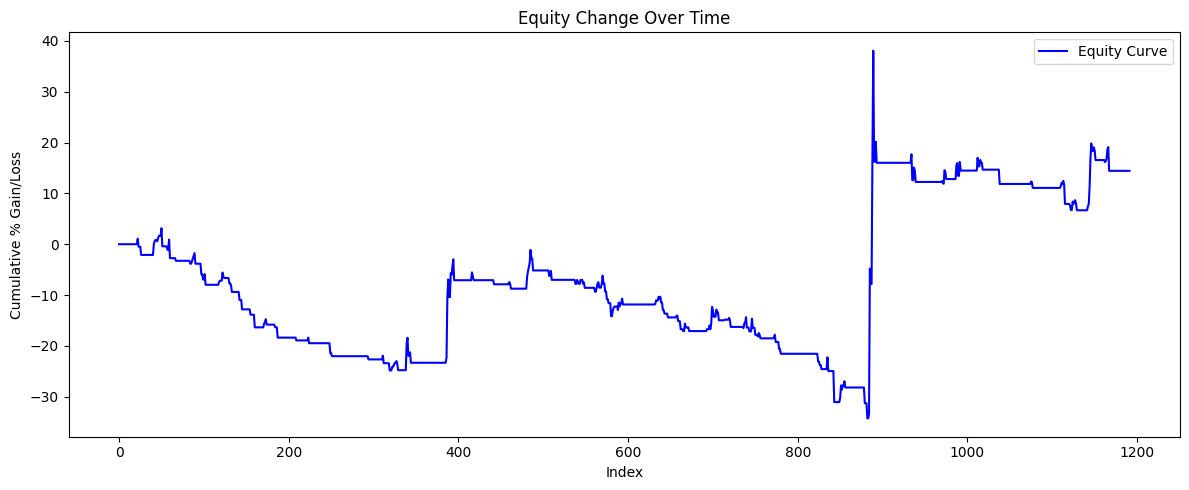

In [4]:
run_back_strategy_core(
    "SNGX",
    12, 26, 9, 14, 5, 20,
    "60d", "15m",
    False, True,
    notebook=True
)

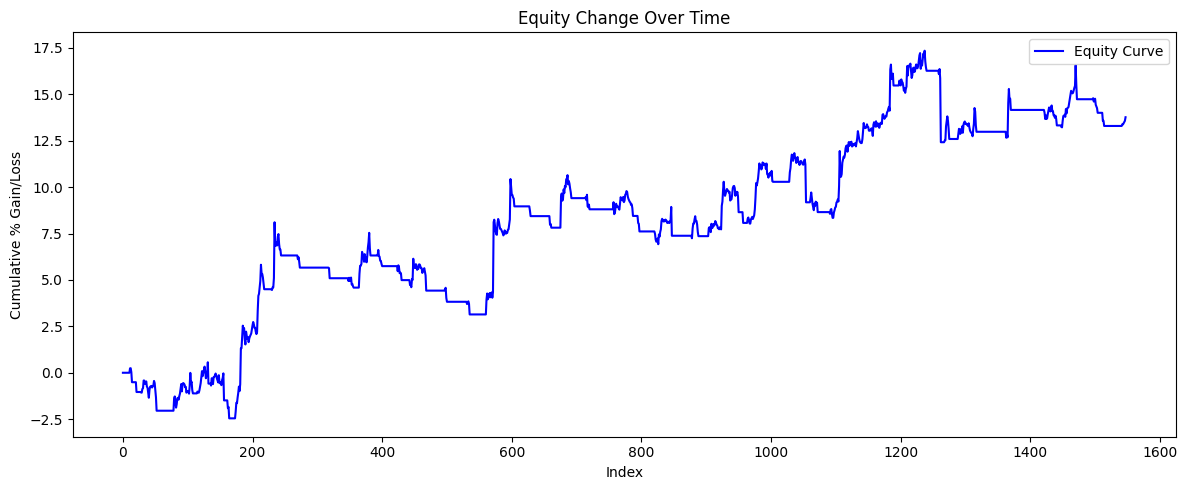

In [5]:
run_back_strategy_core(
    "AVGO",
    12, 26, 9, 14, 5, 20,
    "60d", "15m",
    False, True,
    notebook=True
)